## Make Your Imports and Load Your Data

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import find_peaks

# Remember to check your pathing for your data!
arcs = fits.open('Data/Spectra/arc_lamp0.fits')

## View Your Arclamp Fits File

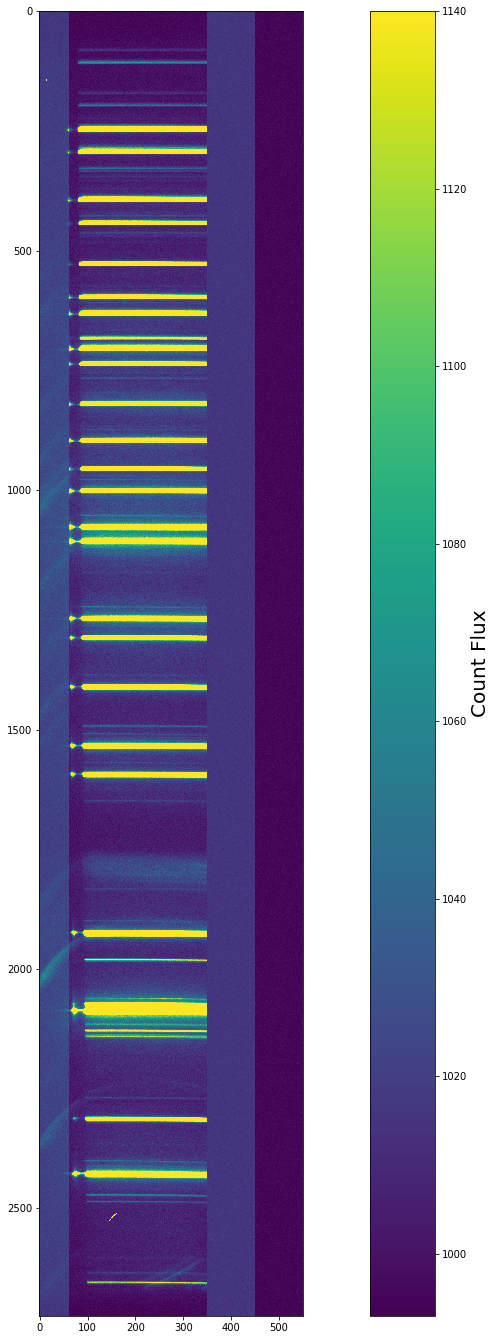

In [5]:
"""
View your arclamp data in python. Uncomment 'l_header' if you want to quickly look up the header variables.
I made the image relatively large just so we can see the details.
"""

l_header = arcs[0].header
l_data = arcs[0].data

plt.figure(figsize = (24,24))
plt.imshow(l_data, vmin = np.percentile(l_data, 4), vmax = np.percentile(l_data, 95))
cb = plt.colorbar(label = 'Count Flux')
cb.set_label(label = 'Count Flux', size = 20)

## Locate The Peak Counts In Your Arclamp Spectroscopy.

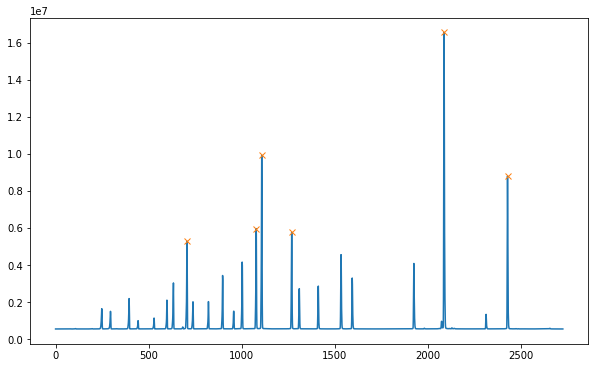

In [13]:
"""
Find the peak counts in your arclamp fits file. Experiment with the 'prominence' value if you want to add or
remove the peaks that appear in your plot. Each peak will be marked with an 'x'.
"""

# Sum up the data along axis 1 in order to create a histogram of sorts displaying the count levels in your fits.
arc1D = np.sum(l_data,axis=1)
plt.figure(figsize = (10,6))
plt.plot(arc1D)

# find_peaks() is a SciPy function that locates the max values in your data using 'prominence' as a limiter of sorts.
peaks, _ = find_peaks(arc1D, prominence = (0.45e7, None), height = 0)

# Overplot your peaks ontop of your data.
plt.plot(peaks, arc1D[peaks], 'x')

## Perform The Wavelength Calibration

#### Hint: http://mthamilton.ucolick.org/techdocs/instruments/kast/images/Kastred1200NeAr_maxtilt.jpg may be a useful plot when determining what wavelengths to use.

In [15]:
"""
Perform your wavelength calibration. We found our peaks, now we need to figure out what wavelengths best match
our data. If you compare the plot you just made to the linked plot above, you may notice some similarities
between how the plots look. What wavelengths best match the peaks on your plot?

Our wavelength calibration will be in y = mx + b form, so we need to calculate m and b. I do this through
using polyfit, a numpy function.
"""

# Create an array of your peaks and a list of wavelengths to use. Make sure the length of your wavelength list
# matches the length of your peaks array.
pks = np.array(peaks)
wvln = [6143.062, 6382.991, 6402.246, 6506.528, 7032.413, 7245.167]

# Run polyfit to get your values.
p = np.polyfit(pks,wvln,1)

# Print those values!
print(p)

[6.40975002e-01 5.69241879e+03]


Text(0, 0.5, 'Peaks')

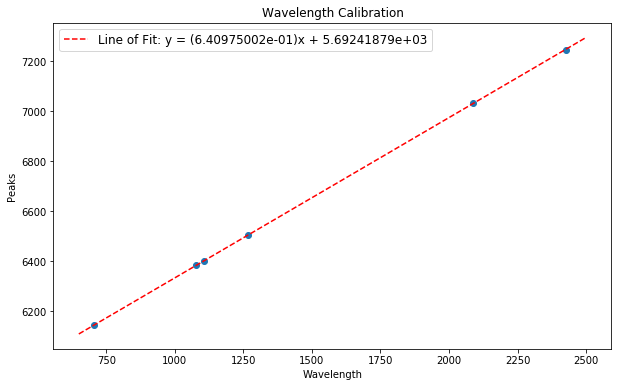

In [20]:
"""
Create a plot of your wavelength calibration. I used polyval, another numpy function, to calculate a line of
fit for my peaks. Create a linspace that encompasses the locations of your peak values (see the x-axis values
in the plot you created above). This linspace will be used by polyval to create your line of fit.
"""

# Create a scatter plot of your peaks and wavelengths.
plt.figure(figsize = (10,6))
plt.scatter(pks,wvln)
pks1 = np.linspace(650,2500)

# Run polyval to calculate your line of fit.
f1 = np.polyval(p,pks1)

# Overplot your line of fit on top of your scatter plot. Use the values you printed above to label your
# line of fit.
plt.plot(pks1, f1, '--', color = 'red', label = 'Line of Fit: y = (6.40975002e-01)x + 5.69241879e+03')
plt.legend(prop = {'size': 12}, markerscale = 2)
plt.title('Wavelength Calibration')
plt.xlabel('Wavelength')
plt.ylabel('Peaks')